## Bhuvi most 60+ runs conceded for India in ODI?

In [106]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [65]:
odidf = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\\CricSheet\\Data Files\\Shishir_ODIs_ball_by_ball.csv")

In [66]:
df = odidf.copy()

In [67]:
df["bowling_team"].unique()

array(['New Zealand', 'Pakistan', 'Australia', 'India', 'Zimbabwe',
       'West Indies', 'South Africa', 'Sri Lanka', 'Bangladesh', 'England',
       'United States of America', 'Kenya', 'Africa XI', 'Asia XI',
       'ICC World XI', 'Ireland', 'Canada', 'Bermuda', 'Netherlands',
       'Scotland', 'Hong Kong', 'United Arab Emirates', 'Afghanistan',
       'Papua New Guinea', 'Nepal', 'Namibia', 'Oman'], dtype=object)

In [68]:
teams = ['New Zealand', 'Pakistan', 'Australia', 'India', 
       'West Indies', 'South Africa', 'Sri Lanka', 'Bangladesh', 'England',
        'Afghanistan']

In [69]:
df=df[df['bowling_team'].isin(teams)]

In [70]:
# Replacing NaN values with 0
df['noballs'] = df['noballs'].fillna(0)
df['wides'] = df['wides'].fillna(0)

In [71]:
df['bowler_runs'] = df["runs_off_bat"] + df["wides"] + df["noballs"]

In [72]:
df.head(5)

match_id   season  start_date      venue  innings  ball batting_team bowling_team       striker   non_striker     bowler  runs_off_bat  extras  wides  noballs  byes  legbyes  penalty wicket_type player_dismissed  other_wicket_type  other_player_dismissed  bowler_runs
0  64857     2003/04  2004-01-03  Eden Park  1        46.1  Pakistan     New Zealand  Abdul Razzaq  Moin Khan     AR Adams   2             0       0.0    0.0     NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2.0        
1  64857     2003/04  2004-01-03  Eden Park  1        4.6   Pakistan     New Zealand  Yasir Hameed  Imran Farhat  DR Tuffey  0             0       0.0    0.0     NaN   NaN      NaN       NaN         NaN             NaN                NaN                      0.0        
2  64857     2003/04  2004-01-03  Eden Park  1        5.1   Pakistan     New Zealand  Imran Farhat  Yasir Hameed  JDP Oram   4             0       0.0    0.0     NaN   NaN      NaN       NaN         NaN             NaN                NaN                      4.0        
3  64857     2003/04  2004-01-03  Eden Park  1        5.2   Pakistan     New Zealand  Imran Farhat  Yasir Hameed  JDP Oram   0             0       0.0    0.0     NaN   NaN      NaN       NaN         NaN             NaN                NaN                      0.0        
4  64857     2003/04  2004-01-03  Eden Park  1        5.3   Pakistan     New Zealand  Imran Farhat  Yasir Hameed  JDP Oram   4             0       0.0    0.0     NaN   NaN      NaN       NaN         NaN             NaN                NaN                      4.0

In [73]:
df1 = pd.DataFrame(df.groupby(['match_id','innings','bowling_team','bowler'])['bowler_runs'].sum().reset_index())

In [74]:
df1['bowler_runs'] = df1['bowler_runs'].astype(int)

In [75]:
df1 = df1[df1['bowler_runs'] >60]

In [76]:
# when we want to groupby and count of same column reset the index using below
#Country wise Bowler 
country_df = pd.DataFrame(df1.groupby(['bowler','bowling_team'])['bowler'].count().reset_index(name="count"))
country_df

bowler  bowling_team  count
0    A Dananjaya          Sri Lanka     6    
1    A Flintoff           England       3    
2    A Kumble             India         1    
3    A Mishra             India         3    
4    A Mithun             India         1    
5    A Nehra              India         13   
6    A Nel                South Africa  5    
7    A Nortje             South Africa  3    
8    A Symonds            Australia     3    
9    A Zampa              Australia     10   
10   AB Agarkar           India         4    
11   AB Dinda             India         1    
12   AC Agar              Australia     3    
13   AD Russell           West Indies   7    
14   AF Giles             England       1    
15   AF Milne             New Zealand   4    
16   AJ Hall              South Africa  2    
17   AJ McKay             New Zealand   3    
18   AJ Tye               Australia     2    
19   AL Phehlukwayo       South Africa  7    
20   AM Ellis             New Zealand   1    
21   AM Fernando          Sri Lanka     1    
22   AR Adams             New Zealand   1    
23   AR Nurse             West Indies   5    
24   AR Patel             India         2    
25   AS Joseph            West Indies   7    
26   AU Rashid            England       27   
27   Aamer Yamin          Pakistan      1    
28   Abdul Razzaq         Pakistan      4    
29   Abdur Rauf           Pakistan      2    
30   Abdur Razzak         Bangladesh    13   
31   Abdur Rehman         Pakistan      1    
32   Aftab Alam           Afghanistan   2    
33   Al-Amin Hossain      Bangladesh    1    
34   Alok Kapali          Bangladesh    1    
35   Anwar Ali            Pakistan      5    
36   B Geeves             Australia     1    
37   B Kumar              India         19   
38   B Lee                Australia     13   
39   B Stanlake           Australia     1    
40   BA Carse             England       1    
41   BA Stokes            England       12   
42   BAW Mendis           Sri Lanka     8    
43   BB Sran              India         1    
44   BM Wheeler           New Zealand   3    
45   BW Hilfenhaus        Australia     2    
46   Bilawal Bhatti       Pakistan      1    
47   C Karunaratne        Sri Lanka     1    
48   C Overton            England       1    
49   C de Grandhomme      New Zealand   2    
50   CAK Rajitha          Sri Lanka     2    
51   CBRLS Kumara         Sri Lanka     3    
52   CD Collymore         West Indies   1    
53   CH Gayle             West Indies   1    
54   CH Morris            South Africa  9    
55   CJ Anderson          New Zealand   6    
56   CJ Dala              South Africa  1    
57   CJ Jordan            England       5    
58   CJ McKay             Australia     6    
59   CK Langeveldt        South Africa  9    
60   CP Tremain           Australia     3    
61   CR Brathwaite        West Indies   7    
62   CR Woakes            England       19   
63   CRD Fernando         Sri Lanka     12   
64   CS Martin            New Zealand   2    
65   CT Tremlett          England       4    
66   D Bishoo             West Indies   3    
67   D Gough              England       2    
68   D Olivier            South Africa  1    
69   D Paterson           South Africa  2    
70   D Pretorius          South Africa  2    
71   D Wiese              South Africa  2    
72   DAJ Bracewell        New Zealand   1    
73   DAS Gunaratne        Sri Lanka     1    
74   DBL Powell           West Indies   3    
75   DE Bernard           West Indies   1    
76   DE Bollinger         Australia     3    
77   DJ Bravo             West Indies   13   
78   DJ Willey            England       6    
79   DJ Worrall           Australia     1    
80   DJG Sammy            West Indies   2    
81   DL Vettori           New Zealand   1    
82   DNT Zoysa            Sri Lanka     1    
83   DR Smith             West Indies   3    
84   DR Tuffey            New Zealand   3    
85   DW Steyn             South Africa  17   
86   Danish Kane

In [14]:
mostrunsdf = country_df.sort_values('count', ascending=False).drop_duplicates(['bowling_team'])
mostrunsdf

bowler  bowling_team  count
298  SL Malinga        Sri Lanka     30   
335  TG Southee        New Zealand   30   
26   AU Rashid         England       27   
266  RA Jadeja         India         22   
355  Wahab Riaz        Pakistan      21   
218  Mashrafe Mortaza  Bangladesh    20   
193  MG Johnson        Australia     18   
85   DW Steyn          South Africa  17   
138  JO Holder         West Indies   17   
87   Dawlat Zadran     Afghanistan   10

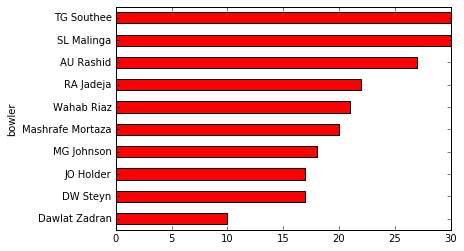

In [94]:
mostrunsdf.groupby(['bowler'])['count'].sum().sort_values(ascending=True).plot(kind = 'barh', color=['red'])


# Conclusion : No Jadega has given away most number of 60+ runs for INDIA


# Bhuvi conceded most 60+ runs  for India in ODI without picking wicket?

In [19]:
newdf = odidf.copy()

In [20]:
def is_bowler_wicket(player_dismissed,wicket_type):
        if type(player_dismissed ) == str:
            if wicket_type not in [ 'run out', 'retired hurt', 'obstructing the field']:
                return 1
            else:
                return 0
        else:
            return 0

In [21]:
newdf['isBowlerWk'] = newdf.apply(lambda x:is_bowler_wicket(x["player_dismissed"],x["wicket_type"]),axis =1)


In [22]:
# Calculating the number of dismisals
dismissals = pd.DataFrame(newdf.groupby(["match_id","bowler"])["isBowlerWk"].sum()).reset_index().rename(columns ={"isBowlerWk":"dismissals"})
dismissals

match_id                 bowler  dismissals
0      64857     AR Adams               0         
1      64857     Abdul Razzaq           1         
2      64857     Azhar Mahmood          1         
3      64857     CL Cairns              1         
4      64857     DL Vettori             0         
5      64857     DR Tuffey              0         
6      64857     JDP Oram               2         
7      64857     Mohammad Sami          0         
8      64857     SB Styris              3         
9      64857     Shabbir Ahmed          1         
10     64857     Shoaib Malik           2         
11     64862     A Nel                  2         
12     64862     CD Collymore           1         
13     64862     CH Gayle               0         
14     64862     L Klusener             3         
15     64862     M Dillon               0         
16     64862     M Ntini                3         
17     64862     RL Powell              0         
18     64862     RO Hurley              1         
19     64862     SM Pollock             1         
20     64862     VC Drakes              1         
21     64864     A Nel                  1         
22     64864     CD Collymore           0         
23     64864     JH Kallis              3         
24     64864     L Klusener             2         
25     64864     M Dillon               1         
26     64864     M Ntini                1         
27     64864     RJ Peterson            0         
28     64864     SM Pollock             1         
29     64865     A Nel                  0         
30     64865     CD Collymore           0         
31     64865     CH Gayle               1         
32     64865     GC Smith               0         
33     64865     JH Kallis              1         
34     64865     L Klusener             0         
35     64865     M Dillon               1         
36     64865     M Ntini                0         
37     64865     R Rampaul              1         
38     64865     RJ Peterson            0         
39     64865     RO Hurley              0         
40     64865     RR Sarwan              1         
41     64865     SM Pollock             2         
42     64870     A Symonds              1         
43     64870     B Lee                  1         
44     64870     BA Williams            0         
45     64870     GB Hogg                5         
46     64870     HDPK Dharmasena        0         
47     64870     JN Gillespie           1         
48     64870     KMDN Kulasekara        0         
49     64870     M Muralitharan         2         
50     64870     MJ Clarke              0         
51     64870     ST Jayasuriya          1         
52     64870     TM Dilshan             0         
53     64870     UDU Chandana           2         
54     64870     WPUJC Vaas             0         
55     64871     A Symonds              1         
56     64871     B Lee                  0         
57     64871     GB Hogg                0         
58     64871     HDPK Dharmasena        1         
59     64871     IJ Harvey              1         
60     64871     JN Gillespie           0         
61     64871     M Muralitharan         0         
62     64871     MJ Clarke              5         
63     64871     RP Arnold              0         
64     64871     ST Jayasuriya          0         
65     64871     TM Dilshan             0         
66     64871     UDU Chandana           1         
67     64871     WPUJC Vaas             3         
68     64872     A Nel                  1         
69     64872     CL Cairns              1         
70     64872     DL Vettori             0         
71     64872     JDP Oram               3         
72     64872     JH Kallis              0         
73     64872     KD Mills               1         
74     64872     L Klusener             0         
75     64872     M Ntini                2         
76     64872     MJ Mason               1         
77     64872     N Boje      

In [23]:
newdf=newdf[newdf['bowling_team'].isin(teams)]

In [24]:
# Replacing NaN values with 0
newdf['noballs'] = newdf['noballs'].fillna(0)
newdf['wides'] = newdf['wides'].fillna(0)

In [25]:
newdf['bowler_runs'] = newdf["runs_off_bat"] + newdf["wides"] + newdf["noballs"]

In [26]:
newdf1 = pd.DataFrame(newdf.groupby(['match_id','innings','bowling_team','bowler'])['bowler_runs'].sum().reset_index())

In [27]:
newdf1['bowler_runs'] = newdf1['bowler_runs'].astype(int)

In [28]:
#Filter bowler conceding more than 60 runs
newdf1 = newdf1[newdf1['bowler_runs'] >=60]
newdf1

match_id  innings  bowling_team               bowler  bowler_runs
0      64857     1        New Zealand   AR Adams             63         
6      64857     2        Pakistan      Abdul Razzaq         61         
16     64862     1        West Indies   VC Drakes            64         
33     64865     1        West Indies   RO Hurley            65         
35     64865     2        South Africa  A Nel                63         
45     64870     1        Sri Lanka     ST Jayasuriya        66         
74     64872     2        South Africa  A Nel                60         
77     64872     2        South Africa  M Ntini              63         
104    64882     1        India         Z Khan               72         
107    64882     2        Pakistan      Shabbir Ahmed        65         
112    64883     1        Pakistan      Mohammad Sami        71         
124    64884     1        India         L Balaji             64         
131    64884     2        Pakistan      Shabbir Ahmed        62         
133    64884     2        Pakistan      Shoaib Akhtar        63         
136    64885     1        Pakistan      Mohammad Sami        63         
139    64885     1        Pakistan      Shoaib Malik         67         
141    64885     2        India         L Balaji             62         
166    64894     1        West Indies   IDR Bradshaw         61         
171    64894     2        England       D Gough              67         
257    64906     2        Sri Lanka     UDU Chandana         61         
294    64914     1        Bangladesh    Tapash Baisya        67         
303    64917     1        Bangladesh    Khaled Mahmud        62         
304    64917     1        Bangladesh    Mashrafe Mortaza     60         
305    64917     1        Bangladesh    Mohammad Rafique     63         
364    64925     2        England       MJ Hoggard           66         
372    64926     1        England       SJ Harmison          65         
381    64927     1        England       Kabir Ali            66         
383    64927     1        England       MJ Hoggard           74         
385    64927     2        South Africa  A Nel                69         
387    64927     2        South Africa  JH Kallis            62         
388    64927     2        South Africa  M Ntini              61         
399    64929     1        South Africa  A Nel                60         
443    64935     2        New Zealand   JW Wilson            68         
445    64935     2        New Zealand   LJ Hamilton          67         
455    64939     1        Pakistan      Mohammad Sami        65         
457    64939     1        Pakistan      Shahid Afridi        82         
458    64939     2        India         A Nehra              72         
467    64941     1        Pakistan      Naved-ul-Hasan       64         
469    64941     1        Pakistan      Shoaib Malik         67         
470    64941     2        India         A Nehra              75         
476    64941     2        India         Z Khan               62         
490    64943     1        India         A Nehra              72         
495    64943     1        India         Z Khan               65         
512    65033     1        India         AB Agarkar           60         
515    65033     1        India         L Balaji             77         
539    65643     1        India         IK Pathan            61         
569    65647     1        Australia     B Lee                83         
571    65647     1        Australia     IJ Harvey            61         
576    65647     2        India         IK Pathan            64         
586    65649     1        Australia     AJ Bichel            60         
588    65649     1        Australia     IJ Harvey            68         
604    65653     2        India         IK Pathan            69         
619    65656     1        India         A Nehra              63         
620    65656     1        India         IK Pathan            75  

In [29]:
# bowler conceding more than 60 runs and their dismisals
newdf2 = pd.merge(newdf1,dismissals, on =["match_id","bowler"],how = 'left')
newdf2

match_id  innings  bowling_team               bowler  bowler_runs  dismissals
0     64857     1        New Zealand   AR Adams             63           0         
1     64857     2        Pakistan      Abdul Razzaq         61           1         
2     64862     1        West Indies   VC Drakes            64           1         
3     64865     1        West Indies   RO Hurley            65           0         
4     64865     2        South Africa  A Nel                63           0         
5     64870     1        Sri Lanka     ST Jayasuriya        66           1         
6     64872     2        South Africa  A Nel                60           1         
7     64872     2        South Africa  M Ntini              63           2         
8     64882     1        India         Z Khan               72           0         
9     64882     2        Pakistan      Shabbir Ahmed        65           0         
10    64883     1        Pakistan      Mohammad Sami        71           1         
11    64884     1        India         L Balaji             64           2         
12    64884     2        Pakistan      Shabbir Ahmed        62           0         
13    64884     2        Pakistan      Shoaib Akhtar        63           2         
14    64885     1        Pakistan      Mohammad Sami        63           3         
15    64885     1        Pakistan      Shoaib Malik         67           1         
16    64885     2        India         L Balaji             62           3         
17    64894     1        West Indies   IDR Bradshaw         61           1         
18    64894     2        England       D Gough              67           1         
19    64906     2        Sri Lanka     UDU Chandana         61           5         
20    64914     1        Bangladesh    Tapash Baisya        67           2         
21    64917     1        Bangladesh    Khaled Mahmud        62           3         
22    64917     1        Bangladesh    Mashrafe Mortaza     60           0         
23    64917     1        Bangladesh    Mohammad Rafique     63           1         
24    64925     2        England       MJ Hoggard           66           1         
25    64926     1        England       SJ Harmison          65           1         
26    64927     1        England       Kabir Ali            66           2         
27    64927     1        England       MJ Hoggard           74           0         
28    64927     2        South Africa  A Nel                69           1         
29    64927     2        South Africa  JH Kallis            62           2         
30    64927     2        South Africa  M Ntini              61           0         
31    64929     1        South Africa  A Nel                60           2         
32    64935     2        New Zealand   JW Wilson            68           1         
33    64935     2        New Zealand   LJ Hamilton          67           0         
34    64939     1        Pakistan      Mohammad Sami        65           1         
35    64939     1        Pakistan      Shahid Afridi        82           0         
36    64939     2        India         A Nehra              72           4         
37    64941     1        Pakistan      Naved-ul-Hasan       64           0         
38    64941     1        Pakistan      Shoaib Malik         67           3         
39    64941     2        India         A Nehra              75           0         
40    64941     2        India         Z Khan               62           1         
41    64943     1        India         A Nehra              72           3         
42    64943     1        India         Z Khan               65           1         
43    65033     1        India         AB Agarkar           60           1         
44    65033     1        India         L Balaji             77           0         
45    65643     1        India         IK Pathan            61           0         
46    65647     1        Australia     B Lee              

In [30]:
# keeping only bowlers who have 0 dismisslas
newdf2 = newdf2[newdf2['dismissals'] == 0]

In [31]:
# when we want to groupby and count of same column reset the index using below
newdf3 = pd.DataFrame(newdf2.groupby(['bowler','bowling_team'])['bowler'].count().reset_index(name="count"))
newdf3

bowler  bowling_team  count
0    A Dananjaya          Sri Lanka     1    
1    A Flintoff           England       1    
2    A Mishra             India         2    
3    A Mithun             India         1    
4    A Nehra              India         2    
5    A Nel                South Africa  5    
6    A Nortje             South Africa  2    
7    A Zampa              Australia     1    
8    AB Agarkar           India         2    
9    AC Agar              Australia     1    
10   AD Russell           West Indies   1    
11   AF Milne             New Zealand   1    
12   AJ Tye               Australia     1    
13   AL Phehlukwayo       South Africa  3    
14   AM Fernando          Sri Lanka     1    
15   AR Adams             New Zealand   1    
16   AR Nurse             West Indies   3    
17   AR Patel             India         2    
18   AU Rashid            England       7    
19   Abdul Razzaq         Pakistan      1    
20   Abdur Rauf           Pakistan      1    
21   Abdur Razzak         Bangladesh    5    
22   Aftab Alam           Afghanistan   1    
23   Aizaz Cheema         Pakistan      1    
24   Amir Hamza           Afghanistan   1    
25   Anwar Ali            Pakistan      3    
26   B Kumar              India         8    
27   B Lee                Australia     1    
28   B Stanlake           Australia     1    
29   BA Stokes            England       2    
30   BAW Mendis           Sri Lanka     2    
31   BB Sran              India         1    
32   BM Wheeler           New Zealand   1    
33   Bilawal Bhatti       Pakistan      1    
34   C Overton            England       1    
35   C de Grandhomme      New Zealand   1    
36   CBRLS Kumara         Sri Lanka     1    
37   CH Gayle             West Indies   1    
38   CH Morris            South Africa  2    
39   CJ Dala              South Africa  1    
40   CJ Jordan            England       2    
41   CJ McKay             Australia     3    
42   CK Langeveldt        South Africa  3    
43   CR Brathwaite        West Indies   2    
44   CR Woakes            England       10   
45   CRD Fernando         Sri Lanka     4    
46   CT Tremlett          England       2    
47   D Bishoo             West Indies   2    
48   D Paterson           South Africa  1    
49   DAS Gunaratne        Sri Lanka     1    
50   DBL Powell           West Indies   1    
51   DE Bollinger         Australia     1    
52   DJ Bravo             West Indies   3    
53   DJ Worrall           Australia     1    
54   DJG Sammy            West Indies   2    
55   DL Vettori           New Zealand   1    
56   DR Smith             West Indies   1    
57   DR Tuffey            New Zealand   1    
58   DW Steyn             South Africa  5    
59   Dawlat Zadran        Afghanistan   2    
60   Faheem Ashraf        Pakistan      2    
61   Farhad Reza          Bangladesh    1    
62   Fawad Alam           Pakistan      1    
63   GJ Maxwell           Australia     1    
64   GP Swann             England       2    
65   Gulbadin Naib        Afghanistan   1    
66   HF Gurney            England       1    
67   HH Pandya            India         3    
68   HK Bennett           New Zealand   1    
69   Harbhajan Singh      India         2    
70   Hasan Ali            Pakistan      3    
71   I Sharma             India         6    
72   I Udana              Sri Lanka     2    
73   IDR Bradshaw         West Indies   2    
74   IJ Harvey            Australia     1    
75   IK Pathan            India         4    
76   IS Sodhi             New Zealand   1    
77   Iftikhar Ahmed       Pakistan      1    
78   Iftikhar Anjum       Pakistan      4    
79   Imad Wasim           Pakistan      4    
80   Imran Tahir          South Africa  2    
81   JA Morkel            South Africa  1    
82   JC Archer            England       1    
83   JDP Oram             New Zealand   2    
84   JDS Neesham          New Zealand   3    
85   JE Root              England       1    
86   JE Taylor  

In [33]:
#Most runs without wicket
mostruns_ww_df = newdf3.sort_values('count', ascending=False).drop_duplicates(['bowling_team'])
mostruns_ww_df

bowler  bowling_team  count
179  RA Jadeja         India         13   
44   CR Woakes         England       10   
199  SL Malinga        Sri Lanka     8    
146  Mashrafe Mortaza  Bangladesh    8    
130  MG Johnson        Australia     8    
217  Shahid Afridi     Pakistan      7    
228  TG Southee        New Zealand   7    
58   DW Steyn          South Africa  5    
94   JO Holder         West Indies   5    
151  Mohammad Nabi     Afghanistan   3

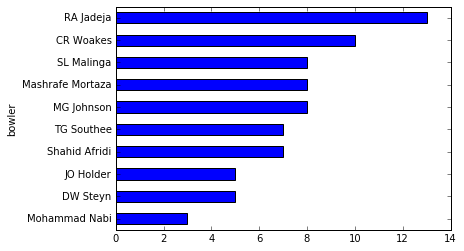

In [95]:
mostruns_ww_df.groupby(['bowler'])['count'].sum().sort_values(ascending=True).plot(kind = 'barh', color=['blue'])

# Conclusion : Jaddu has  conceded most 60+ runs  for India in ODI without picking wicket

In [100]:
mostruns_ww_India_df  = newdf3[newdf3["bowling_team"] =="India"].sort_values("count", ascending = False) .head(10)
mostruns_ww_India_df

bowler bowling_team  count
179  RA Jadeja       India        13   
26   B Kumar         India        8    
175  R Ashwin        India        7    
71   I Sharma        India        6    
154  Mohammed Shami  India        4    
75   IK Pathan       India        4    
234  UT Yadav        India        4    
117  Kuldeep Yadav   India        4    
192  S Sreesanth     India        3    
139  MM Patel        India        3

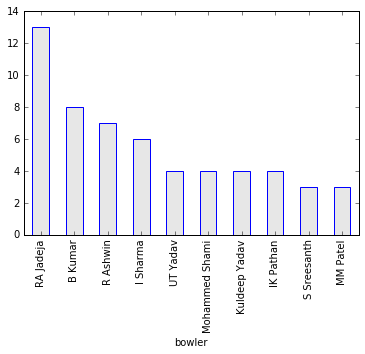

In [117]:
mostruns_ww_India_df.groupby(['bowler'])['count'].sum().sort_values(ascending =  False).plot( kind ='bar', color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')


# But BHUVI is the Pacer who has  conceded most 60+ runs  for India in ODI without picking wicket